## Semantic Similarity to Neutral Concepts

In [43]:
import pandas as pd
llama = pd.read_csv(f'./seperate models/some-removed/with_embeddings/Llama-3.1-SAE_with_embeddings_with_cosine_score.csv')
mistral = pd.read_csv(f'./seperate models/some-removed/with_embeddings/Mistral-SAE_with_embeddings_with_cosine_score.csv')
phi = pd.read_csv(f'./seperate models/some-removed/with_embeddings/Phi-3-medium-SAE_with_embeddings_with_cosine_score.csv')

In [44]:
print(llama.columns)
print(mistral.columns)
print(phi.columns)

Index(['african_american_english', 'standard_american_english',
       'SAE embeddings', 'AAE embeddings', 'Positive Prompt score with SAE',
       'Negative Prompt score with SAE', 'Positive Prompt score with AAE',
       'Negative Prompt score with AAE'],
      dtype='object')
Index(['african_american_english', 'standard_american_english',
       'SAE embeddings', 'AAE embeddings', 'Positive Prompt score with SAE',
       'Negative Prompt score with SAE', 'Positive Prompt score with AAE',
       'Negative Prompt score with AAE'],
      dtype='object')
Index(['standard_american_english', 'african_american_english',
       'SAE embeddings', 'AAE embeddings', 'Positive Prompt score with SAE',
       'Negative Prompt score with SAE', 'Positive Prompt score with AAE',
       'Negative Prompt score with AAE'],
      dtype='object')


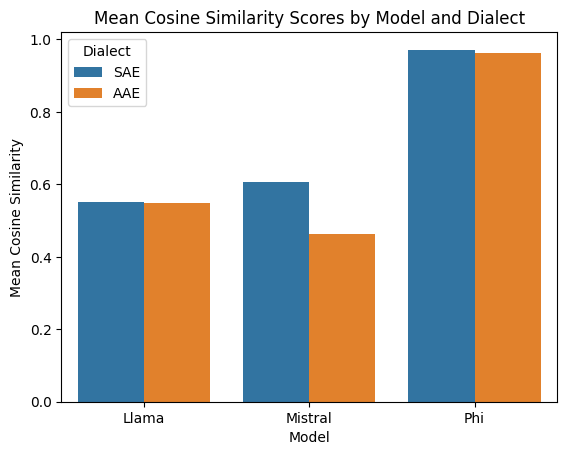

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataframes 'llama', 'mistral', and 'phi'

# Compute mean cosine similarity scores for each model and dialect
data = []
for model_name, df in zip(['Llama', 'Mistral', 'Phi'], [llama, mistral, phi]):
    sae_mean = df['Positive Prompt score with SAE'].mean()
    aae_mean = df['Positive Prompt score with AAE'].mean()
    data.append({'Model': model_name, 'Dialect': 'SAE', 'Mean Cosine Similarity': sae_mean})
    data.append({'Model': model_name, 'Dialect': 'AAE', 'Mean Cosine Similarity': aae_mean})

# Create a DataFrame for plotting
mean_df = pd.DataFrame(data)

# Create the seaborn bar plot
sns.barplot(data=mean_df, x='Model', y='Mean Cosine Similarity', hue='Dialect')
plt.title('Mean Cosine Similarity Scores by Model and Dialect')
plt.ylabel('Mean Cosine Similarity')
plt.xlabel('Model')
plt.legend(title='Dialect')
plt.show()

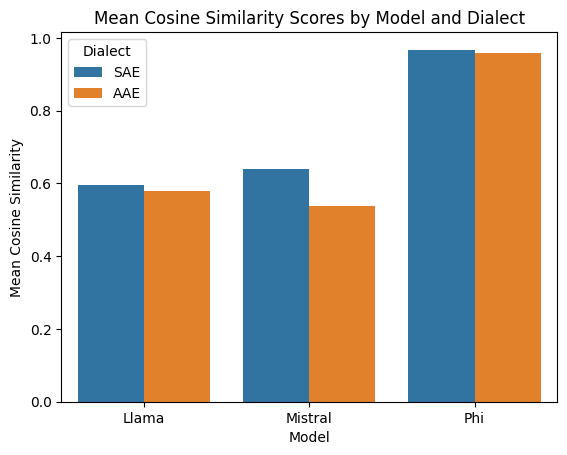

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataframes 'llama', 'mistral', and 'phi'

# Compute mean cosine similarity scores for each model and dialect
data = []
for model_name, df in zip(['Llama', 'Mistral', 'Phi'], [llama, mistral, phi]):
    sae_mean = df['Negative Prompt score with SAE'].mean()
    aae_mean = df['Negative Prompt score with AAE'].mean()
    data.append({'Model': model_name, 'Dialect': 'SAE', 'Mean Cosine Similarity': sae_mean})
    data.append({'Model': model_name, 'Dialect': 'AAE', 'Mean Cosine Similarity': aae_mean})

# Create a DataFrame for plotting
mean_df = pd.DataFrame(data)

# Create the seaborn bar plot
sns.barplot(data=mean_df, x='Model', y='Mean Cosine Similarity', hue='Dialect')
plt.title('Mean Cosine Similarity Scores by Model and Dialect')
plt.ylabel('Mean Cosine Similarity')
plt.xlabel('Model')
plt.legend(title='Dialect')
plt.show()

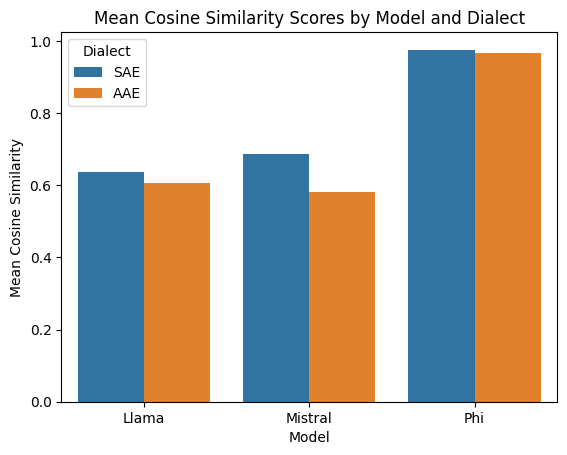

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the dataframes 'llama', 'mistral', and 'phi'

# Compute mean cosine similarity scores for each model and dialect
data = []
for model_name, df in zip(['Llama', 'Mistral', 'Phi'], [llama, mistral, phi]):
    sae_mean = df['SAE : This is foul language, not english.'].mean()
    aae_mean = df['AAE : This is foul language, not english.'].mean()
    data.append({'Model': model_name, 'Dialect': 'SAE', 'Mean Cosine Similarity': sae_mean})
    data.append({'Model': model_name, 'Dialect': 'AAE', 'Mean Cosine Similarity': aae_mean})

# Create a DataFrame for plotting
mean_df = pd.DataFrame(data)

# Create the seaborn bar plot
sns.barplot(data=mean_df, x='Model', y='Mean Cosine Similarity', hue='Dialect')
plt.title('Mean Cosine Similarity Scores by Model and Dialect')
plt.ylabel('Mean Cosine Similarity')
plt.xlabel('Model')
plt.legend(title='Dialect')
plt.show()

In [12]:
import torch
from transformers import AutoModel, AutoModelForCausalLM, AutoTokenizer
import numpy as np
from sklearn.decomposition import PCA
from tqdm import tqdm
import os
from ast import literal_eval

In [51]:
for df in [llama, mistral, phi]:
    df['SAE embeddings'] = df['SAE embeddings'].apply(lambda x: np.array(literal_eval(x)))
    df['AAE embeddings'] = df['AAE embeddings'].apply(lambda x: np.array(literal_eval(x)))

In [14]:
len_data = llama.shape[0]

In [52]:
llama['AAE embeddings'].to_numpy().shape

(4992,)

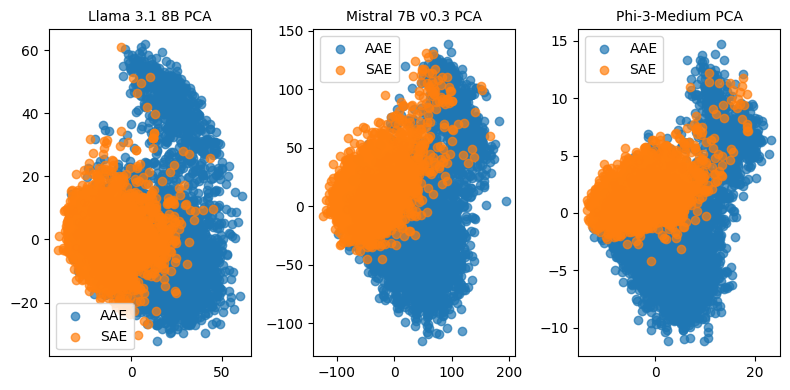

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Convert embeddings to NumPy arrays
llama_sae_embeddings = np.array(llama['SAE embeddings'].tolist())
llama_aae_embeddings = np.array(llama['AAE embeddings'].tolist())

mistral_sae_embeddings = np.array(mistral['SAE embeddings'].tolist())
mistral_aae_embeddings = np.array(mistral['AAE embeddings'].tolist())

phi_sae_embeddings = np.array(phi['SAE embeddings'].tolist())
phi_aae_embeddings = np.array(phi['AAE embeddings'].tolist())

# Perform PCA for each model
pca = PCA(n_components=3)

# Llama Model
combined_embeddings_llama = np.vstack((llama_aae_embeddings, llama_sae_embeddings))
pca_result_llama = pca.fit_transform(combined_embeddings_llama)

# Mistral Model
combined_embeddings_mistral = np.vstack((mistral_aae_embeddings, mistral_sae_embeddings))
pca_result_mistral = pca.fit_transform(combined_embeddings_mistral)

# Phi Model
combined_embeddings_phi = np.vstack((phi_aae_embeddings, phi_sae_embeddings))
pca_result_phi = pca.fit_transform(combined_embeddings_phi)

# Define the figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 4))

# Plot PCA for Llama
axs[0].scatter(pca_result_llama[:len(llama_aae_embeddings), 0], pca_result_llama[:len(llama_aae_embeddings), 1], label='AAE', alpha=0.7)
axs[0].scatter(pca_result_llama[len(llama_aae_embeddings):, 0], pca_result_llama[len(llama_aae_embeddings):, 1], label='SAE', alpha=0.7)
axs[0].set_title('Llama 3.1 8B PCA', fontsize=10)
axs[0].legend()

# Plot PCA for Mistral
axs[1].scatter(pca_result_mistral[:len(mistral_aae_embeddings), 0], pca_result_mistral[:len(mistral_aae_embeddings), 1], label='AAE', alpha=0.7)
axs[1].scatter(pca_result_mistral[len(mistral_aae_embeddings):, 0], pca_result_mistral[len(mistral_aae_embeddings):, 1], label='SAE', alpha=0.7)
axs[1].set_title('Mistral 7B v0.3 PCA',fontsize=10)
axs[1].legend()

# Plot PCA for Phi
axs[2].scatter(pca_result_phi[:len(phi_aae_embeddings), 0], pca_result_phi[:len(phi_aae_embeddings), 1], label='AAE', alpha=0.7)
axs[2].scatter(pca_result_phi[len(phi_aae_embeddings):, 0], pca_result_phi[len(phi_aae_embeddings):, 1], label='SAE', alpha=0.7)
axs[2].set_title('Phi-3-Medium PCA', fontsize=10)
axs[2].legend()

plt.tight_layout()
plt.savefig("PCA_AAE_SAE_three_models.png")
plt.show()


## LLAMA

In [53]:
# Convert embeddings to NumPy arrays
sae_embeddings = np.array(llama['SAE embeddings'].tolist())
aae_embeddings = np.array(llama['AAE embeddings'].tolist())

# Verify the shapes
print("SAE embeddings shape:", sae_embeddings.shape)
print("AAE embeddings shape:", aae_embeddings.shape)

SAE embeddings shape: (4992, 4096)
AAE embeddings shape: (4992, 4096)


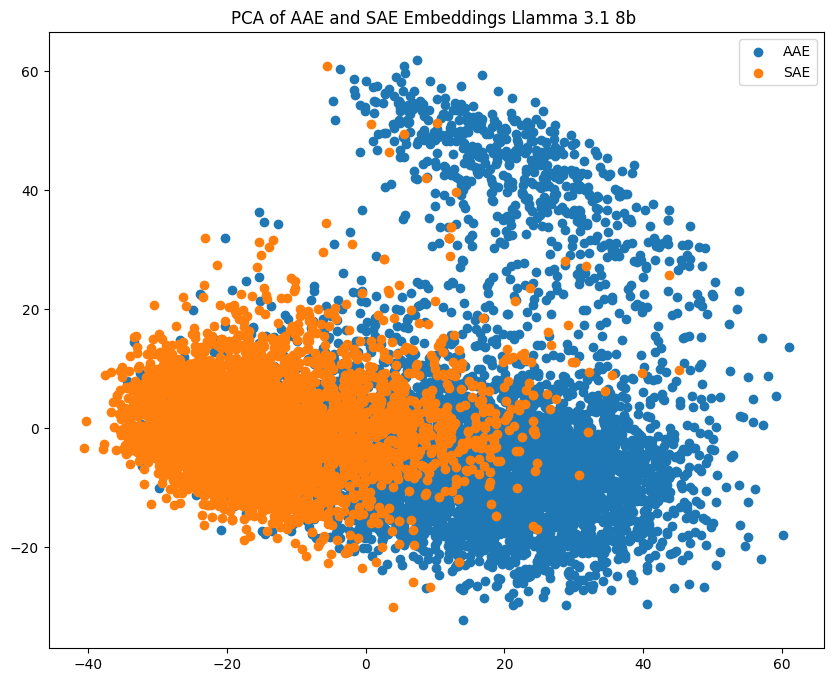

Average alignment score LLAMA: 0.5650305118649771


In [58]:
# Perform PCA
pca = PCA(n_components=3)
combined_embeddings = np.vstack((aae_embeddings, sae_embeddings))
pca_result = pca.fit_transform(combined_embeddings)

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:len_data, 0], pca_result[:len_data, 1], label='AAE')
plt.scatter(pca_result[len_data:, 0], pca_result[len_data:, 1], label='SAE')

plt.legend()
plt.title('PCA of AAE and SAE Embeddings Llamma 3.1 8b ')
plt.savefig("PCA_AAE_SAE_llama.png")
plt.show()

# Calculate alignment score
def alignment_score(emb1, emb2):
    return np.mean(np.abs(emb1 - emb2))

avg_alignment = np.mean([alignment_score(llama['SAE embeddings'], llama['AAE embeddings']) for i in range(len_data)])
print(f"Average alignment score LLAMA: {avg_alignment}")

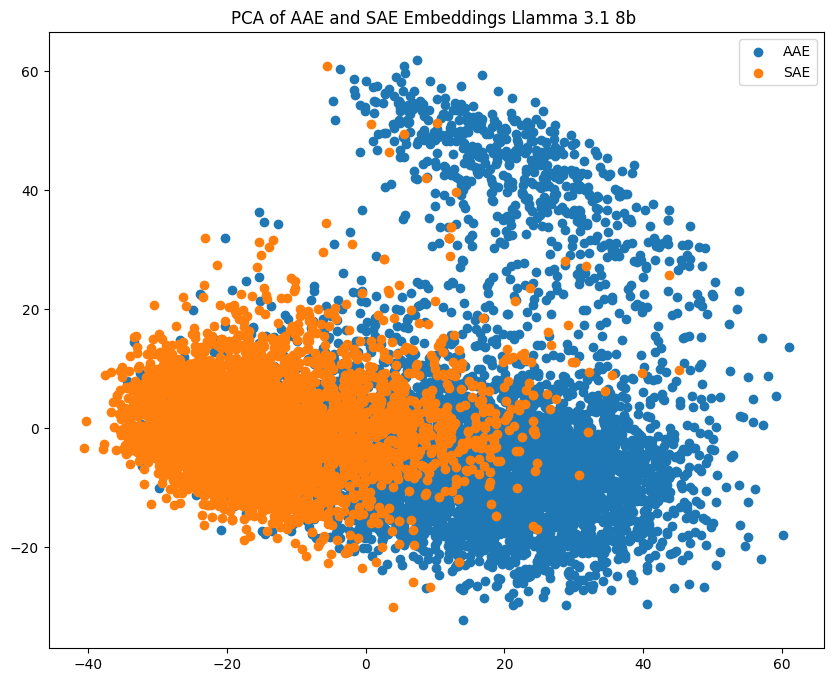

In [59]:
# Perform PCA
pca = PCA(n_components=3)
combined_embeddings = np.vstack((aae_embeddings, sae_embeddings))
pca_result = pca.fit_transform(combined_embeddings)

# Visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:len_data, 0], pca_result[:len_data, 1], label='AAE')
plt.scatter(pca_result[len_data:, 0], pca_result[len_data:, 1], label='SAE')

plt.legend()
plt.title('PCA of AAE and SAE Embeddings Llamma 3.1 8b ')
plt.savefig("PCA_AAE_SAE_llama.png")
plt.show()

# Calculate alignment score
def alignment_score(emb1, emb2):
    return np.mean(np.abs(emb1 - emb2))

#avg_alignment = np.mean([alignment_score(llama['SAE embeddings'], llama['AAE embeddings']) for i in range(len_data)])
#print(f"Average alignment score LLAMA: {avg_alignment}")

## Mistral

In [60]:
# Convert embeddings to NumPy arrays
sae_embeddings = np.array(mistral['SAE embeddings'].tolist())
aae_embeddings = np.array(mistral['AAE embeddings'].tolist())

# Verify the shapes
print("SAE embeddings shape:", sae_embeddings.shape)
print("AAE embeddings shape:", aae_embeddings.shape)

SAE embeddings shape: (4993, 4096)
AAE embeddings shape: (4993, 4096)


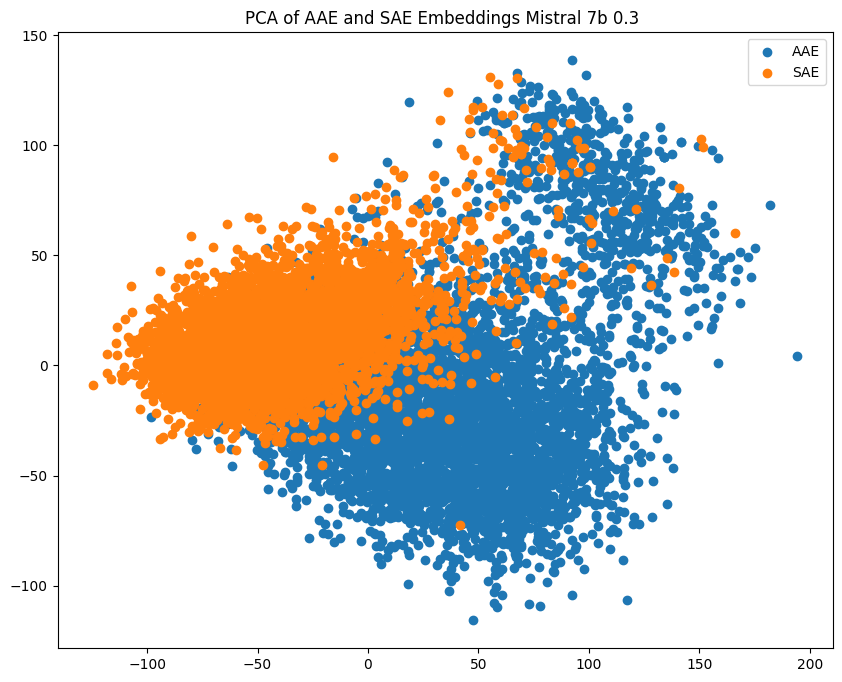

Average alignment score Mistral: 1.3544380352395842


In [64]:
# Perform PCA
pca = PCA(n_components=3)
combined_embeddings = np.vstack((aae_embeddings, sae_embeddings))
pca_result = pca.fit_transform(combined_embeddings)
 

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:len_data, 0], pca_result[:len_data, 1], label='AAE')
plt.scatter(pca_result[len_data:, 0], pca_result[len_data:, 1], label='SAE')
plt.legend()
plt.title('PCA of AAE and SAE Embeddings Mistral 7b 0.3 ')
plt.savefig("PCA_AAE_SAE_mistral.png")
plt.show()


#avg_alignment_mistral = np.mean([alignment_score(mistral['SAE embeddings'], mistral['AAE embeddings']) for i in range(len_data)])
print(f"Average alignment score Mistral: {avg_alignment_mistral}")

In [36]:
print(f"Average alignment score Mistral: {avg_alignment_mistral}")

Average alignment score Mistral: 1.3544380352395842


## Phi

In [65]:
# Convert embeddings to NumPy arrays
sae_embeddings = np.array(phi['SAE embeddings'].tolist())
aae_embeddings = np.array(phi['AAE embeddings'].tolist())

# Verify the shapes
print("SAE embeddings shape:", sae_embeddings.shape)
print("AAE embeddings shape:", aae_embeddings.shape)

SAE embeddings shape: (4993, 5120)
AAE embeddings shape: (4993, 5120)


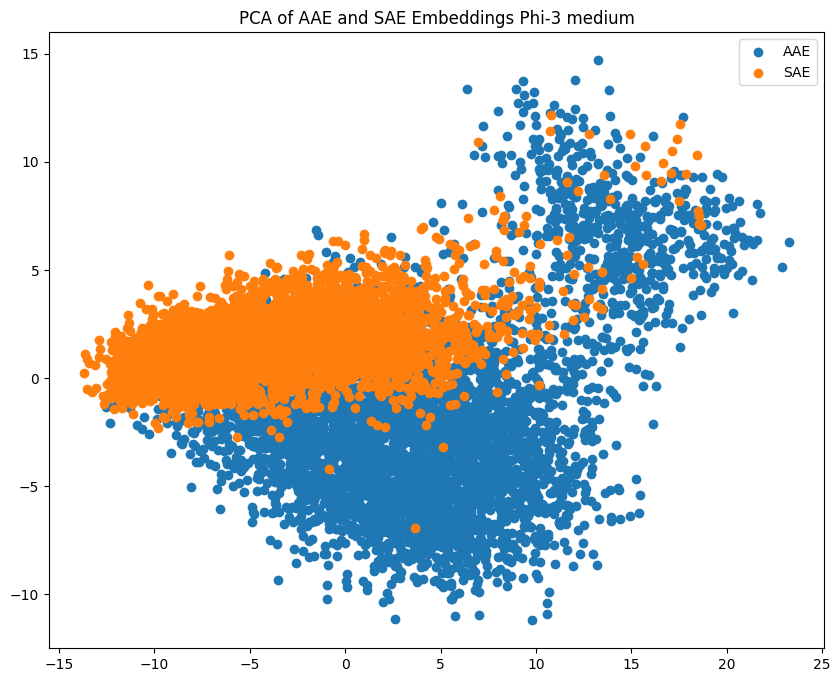

Average alignment score Phi-3 medium: 0.12431627401021722


In [68]:
# Perform PCA
pca = PCA(n_components=3)
combined_embeddings = np.vstack((aae_embeddings, sae_embeddings))
pca_result = pca.fit_transform(combined_embeddings)
 

plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:len_data, 0], pca_result[:len_data, 1], label='AAE')
plt.scatter(pca_result[len_data:, 0], pca_result[len_data:, 1], label='SAE')
plt.legend()
plt.title('PCA of AAE and SAE Embeddings Phi-3 medium')
plt.savefig("PCA_AAE_SAE_phi.png")
plt.show()


#avg_alignment_phi = np.mean([alignment_score(phi['SAE embeddings'], phi['AAE embeddings']) for i in range(len_data)])
print(f"Average alignment score Phi-3 medium: {avg_alignment_phi}")

In [38]:
print(f"Average alignment score Phi: {avg_alignment_phi}")

Average alignment score Phi: 0.12431627401021722


In [41]:
# Convert numpy arrays to lists for JSON serialization
for df in [llama, mistral, phi]:
    df['SAE embeddings'] = df['SAE embeddings'].apply(lambda x: x.tolist())
    df['AAE embeddings'] = df['AAE embeddings'].apply(lambda x: x.tolist())

In [42]:
import json

# Prepare data to include both DataFrame contents and average alignment scores
llama_data = {
    "data": llama.to_dict(orient='records'),
    "average_alignment_score": avg_alignment
}

mistral_data = {
    "data": mistral.to_dict(orient='records'),
    "average_alignment_score": avg_alignment_mistral 
}

phi_data = {
    "data": phi.to_dict(orient='records'),
    "average_alignment_score": avg_alignment_phi
}

# Save the combined data to JSON files
with open('./seperate models/some-removed/with_embeddings/Llama-3.1-SAE_with_embeddings_with_align.json', 'w') as json_file:
    json.dump(llama_data, json_file)

with open('./seperate models/some-removed/with_embeddings/Mistral-SAE_with_embeddings_with_align.json', 'w') as json_file:
    json.dump(mistral_data, json_file)

with open('./seperate models/some-removed/with_embeddings/Phi-3-medium-SAE_with_embeddings_with_align.json', 'w') as json_file:
    json.dump(phi_data, json_file)

print("Data and average alignment scores saved successfully.")

Data and average alignment scores saved successfully.
